## Import Python Packages

In [1]:
import numpy as np
import scipy as sci
import pyDOE
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tsa.holtwinters import ExponentialSmoothing
%matplotlib inline
import sklearn
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize, TweetTokenizer
from nltk import pos_tag
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#nltk.download('punkt')
import re, string
from wordcloud import WordCloud
import seaborn as sns
sns.set_style('white')
#nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer 
#nltk.download('wordnet')
#nltk.download('all')
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
from sklearn.decomposition import LatentDirichletAllocation as LDA
from pyLDAvis import sklearn as sklearn_lda
import pyLDAvis
from textblob import TextBlob
import time
#!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
#!pip install nlu
!pip install NRCLex
from nrclex import NRCLex

C:\ProgramData\Anaconda3\lib\site-packages\past\types\oldstr.py:33: DeprecationWarning: invalid escape sequence \d
  """


Imported AutoViz_Class version: 0.0.74. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
ALERT: verbose=2 saves plots in local disk under AutoViz_Plots dir and does not display charts anymore


## Exploratory Analysis

In [2]:
songs_df=pd.read_csv('taylor_swift_lyrics.csv',encoding = "latin1")
songs_df.describe()
songs_df

,artist,album,track_title,track_n,lyric,line,year
0,Taylor Swift,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006
1,Taylor Swift,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006
2,Taylor Swift,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006
3,Taylor Swift,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006
4,Taylor Swift,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006
5,Taylor Swift,Taylor Swift,Tim McGraw,1,On backroads at night,6,2006
6,Taylor Swift,Taylor Swift,Tim McGraw,1,And I was right there beside him all summer long,7,2006
7,Taylor Swift,Taylor Swift,Tim McGraw,1,And then the time we woke up to find that summ...,8,2006
8,Taylor Swift,Taylor Swift,Tim McGraw,1,But when you think Tim McGraw,9,2006
9,Taylor Swift,Taylor Swift,Tim McGraw,1,I hope you think my favorite song,10,2006


## Number of Tracks per Album 

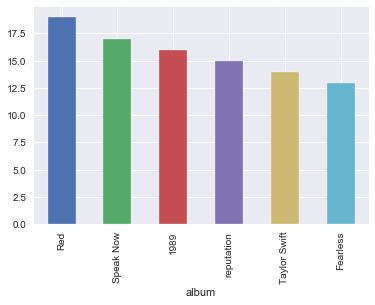

In [3]:
songs_df.groupby(['album'])['track_title'].nunique().sort_values(ascending=False).plot('bar')

In [4]:
songs_df['lyric_text_processed'] = songs_df['lyric'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the reviews to lowercase
songs_df['lyric_text_processed'] = songs_df['lyric_text_processed'].map(lambda x: x.lower())
songs_df

,artist,album,track_title,track_n,lyric,line,year,lyric_text_processed
0,Taylor Swift,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006,he said the way my blue eyes shined
1,Taylor Swift,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006,put those georgia stars to shame that night
2,Taylor Swift,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006,"i said ""that's a lie"""
3,Taylor Swift,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006,just a boy in a chevy truck
4,Taylor Swift,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006,that had a tendency of gettin' stuck
5,Taylor Swift,Taylor Swift,Tim McGraw,1,On backroads at night,6,2006,on backroads at night
6,Taylor Swift,Taylor Swift,Tim McGraw,1,And I was right there beside him all summer long,7,2006,and i was right there beside him all summer long
7,Taylor Swift,Taylor Swift,Tim McGraw,1,And then the time we woke up to find that summ...,8,2006,and then the time we woke up to find that summ...
8,Taylor Swift,Taylor Swift,Tim McGraw,1,But when you think Tim McGraw,9,2006,but when you think tim mcgraw
9,Taylor Swift,Taylor Swift,Tim McGraw,1,I hope you think my favorite song,10,2006,i hope you think my favorite song


## Ngram Analysis

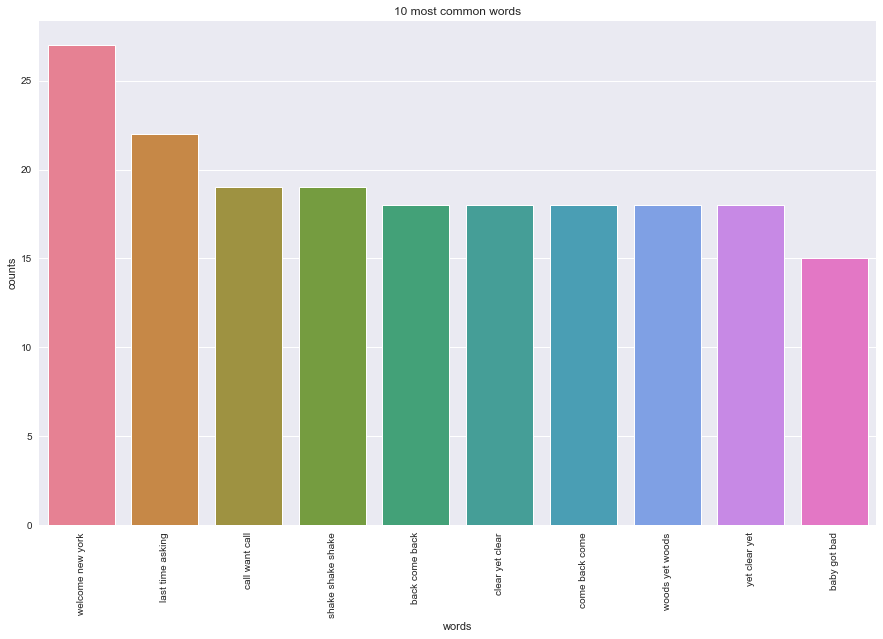

Topics found via LDA:

Topic #0:
mm mm mm tell lucky one usin rest life

Topic #1:
welcome new york last time asking got bad blood

Topic #2:
call want call getting back together ever getting back

Topic #3:
back come back come back come wanna end game

Topic #4:
shake shake shake yet clear yet clear yet clear


In [5]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['oh','ooh','ey','la']
stopwords.extend(newStopWords)
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(ngram_range=(3,3), stop_words=stopwords)
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(songs_df['lyric_text_processed'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 3
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)
LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
pyLDAvis.display(LDAvis_prepared)

## Sentiment Analysis

Final summarized counts : [3667, 689, 506]

 Pie Representation 
-------------------


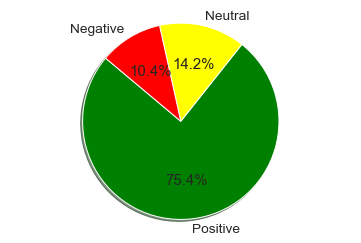

In [6]:
songs_df['sentiment'] = songs_df['lyric_text_processed'].apply(lambda text: TextBlob(text).sentiment)
songs_df
#Categorize Polarity into Positive, Neutral or Negative
labels = ["Positive", "Neutral", "Negative"]
#Initialize count array
values =[0,0,0]

#Categorize each review
for text in songs_df['lyric_text_processed']:
    sentiment = TextBlob(text)
    
    #Custom formula to convert polarity 
    # 0 = (Negative) 1 = (Neutral) 2=(Positive)
    polarity = round(( sentiment.polarity + 1 ) * 3 ) % 3
    
    #add the summary array
    values[polarity] = values[polarity] + 1
    
print("Final summarized counts :", values)

import matplotlib.pyplot as plt
#Set colors by label
colors=["Green","Yellow","Red"]

print("\n Pie Representation \n-------------------")
#Plot a pie chart
plt.pie(values, labels=labels, colors=colors, \
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

{'fear': 0.08737469520455161, 'anger': 0.0615009482525061, 'anticip': 0.0, 'trust': 0.09089677594147927, 'surprise': 0.05852072609049038, 'positive': 0.1853156326198862, 'negative': 0.145759956651314, 'sadness': 0.09238688702248712, 'disgust': 0.04836087781089136, 'joy': 0.1322134922785153, 'anticipation': 0.09767000812787863}
[('positive', 0.1853156326198862)]
{'sadness': 682, 'disgust': 357, 'fear': 645, 'negative': 1076, 'anger': 454, 'trust': 671, 'anticipation': 721, 'joy': 976, 'positive': 1368, 'surprise': 432}


<BarContainer object of 10 artists>

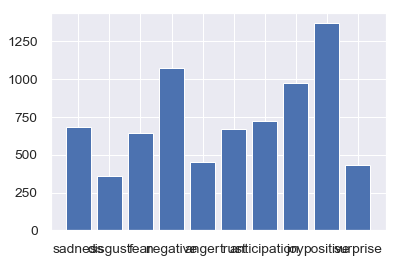

In [7]:
text_object = NRCLex(songs_df['lyric_text_processed'].to_string())
print(text_object.affect_frequencies)
print(text_object.top_emotions)
songs_dict=text_object.raw_emotion_scores
#songs_dict.sort_values(ascending=False)
print(songs_dict)
keys = songs_dict.keys()
values = songs_dict.values()

plt.bar(keys, values)